[101001] <- asking the box for random number: 000000, 000001 ... ? 

Computer would use 'AND' 
101001 + 000001 = 00000"1" .. continue for AND 

In [25]:
from qiskit import *
%matplotlib inline 
from qiskit.tools.visualization import plot_histogram

In [49]:
secretnumber = '1111'

circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))

#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
#circuit.x(6)
circuit.h(len(secretnumber))

circuit.barrier()

for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))

#circuit.cx(5, 6)
#circuit.cx(3, 6)
#circuit.cx(0, 6)

circuit.barrier()
circuit.h(len(secretnumber))
circuit.barrier()
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

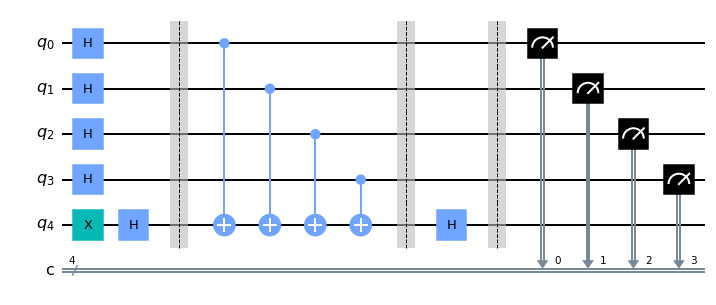

In [50]:
circuit.draw(output='mpl')

In [51]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'1000': 1}
